In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
13129,49,Private,200949,10th,6,Never-married,Other-service,Unmarried,White,Female,0,0,38,Peru,<=50K
28121,27,Private,302422,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
37813,44,Private,148316,Assoc-acdm,12,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K.
23519,46,Local-gov,303918,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,7688,0,96,United-States,>50K
20162,52,Self-emp-inc,81436,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
dfnull = df[df.isnull().any(axis=1)].shape[0]

print(f'Persentage of rows with missing data: {dfnull/df.shape[0]*100:.2f}%')

Persentage of rows with missing data: 2.50%


In [5]:
df.dropna(inplace=True)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfimp = df.copy()
dfimp[dfimp.select_dtypes(include=['object']).columns] = dfimp[dfimp.select_dtypes(include=['object']).columns].apply(le.fit_transform)
dfimp.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
44933,75,6,124256,15,10,2,4,0,4,1,0,2149,35,39,1
26811,48,4,43206,14,15,0,10,4,4,0,0,0,25,39,0
32951,50,4,138193,9,13,0,10,2,4,0,0,0,50,39,3
24481,42,6,185129,14,15,2,10,0,4,1,0,1887,40,39,2
12304,55,4,223594,15,10,2,3,0,2,1,7688,0,40,33,2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

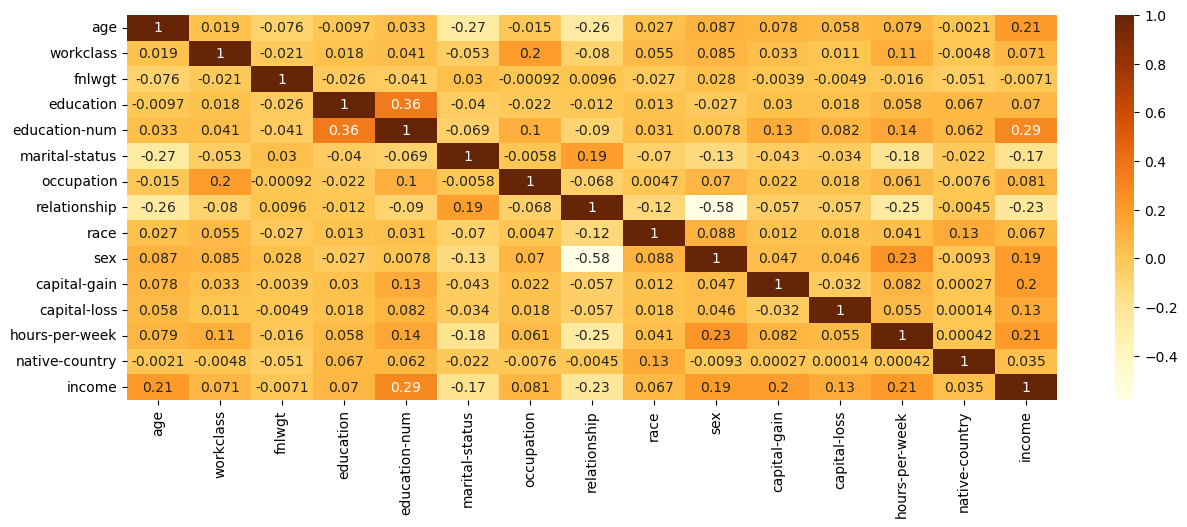

In [8]:
plt.figure(figsize=(15, 5))
sns.heatmap(dfimp.corr(), annot=True, cmap='YlOrBr')

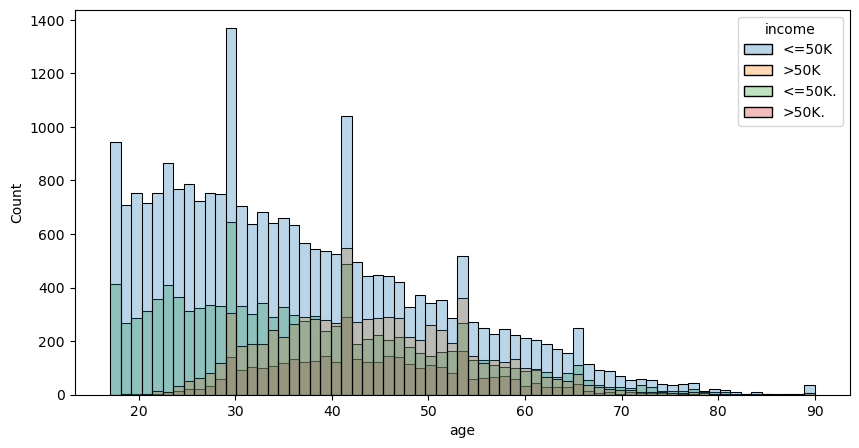

In [9]:
x = df['age']

plt.figure(figsize=(10, 5))
sns.histplot(x=x, hue = df['income'], alpha=0.3)
plt.show()

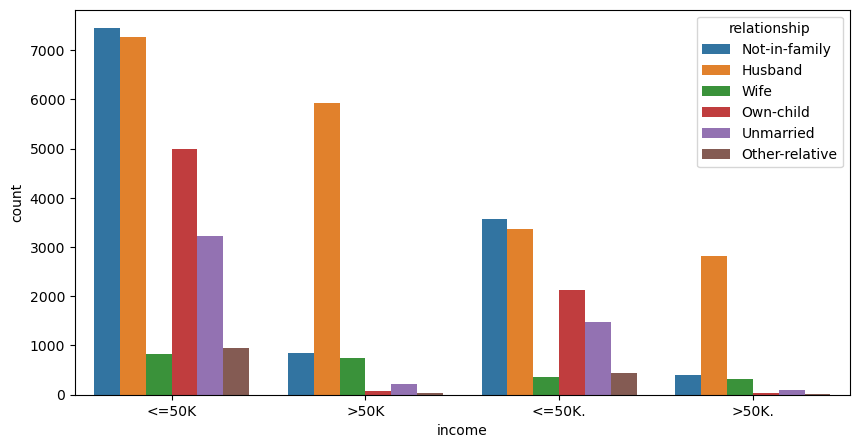

In [10]:
x = df['income']
plt.figure(figsize=(10, 5))
sns.countplot(x=x,hue=df['relationship'])
plt.show()

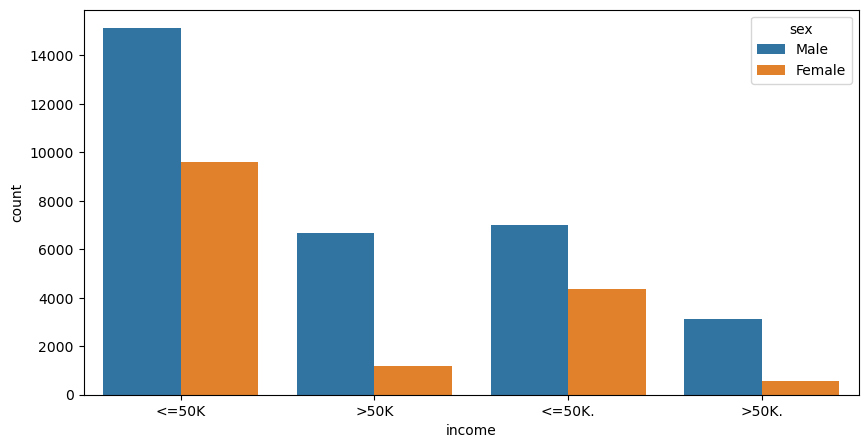

In [11]:
x = df['income']
plt.figure(figsize=(10, 5))
sns.countplot(x=x, hue=df['sex'])
plt.show()

In [12]:
x = dfimp.drop('income',axis=1)
y = df['income']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 54.84%


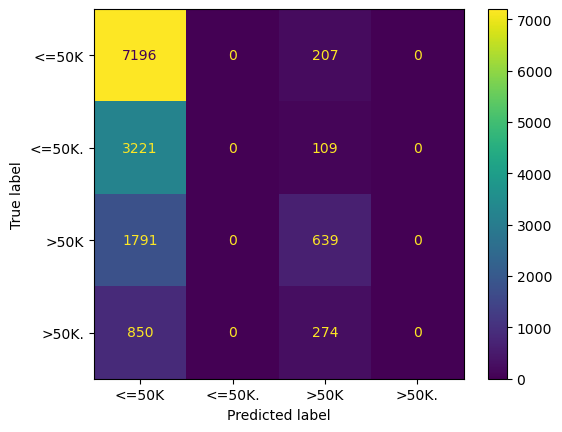

In [14]:
#Supervised Learning - Regression - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1,max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

Accuracy: 46.43%


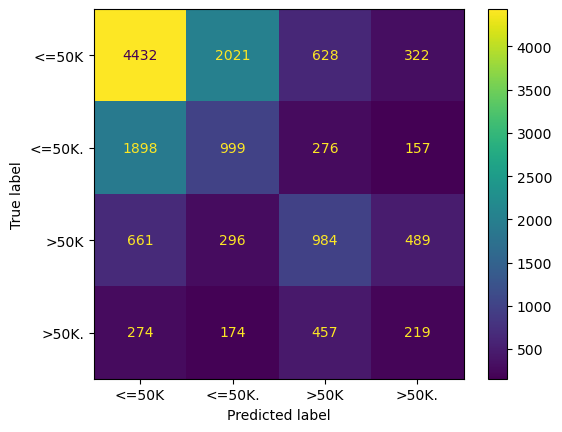

In [15]:
#Supervised Learning - Classification - Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

Accuracy: 55.05%


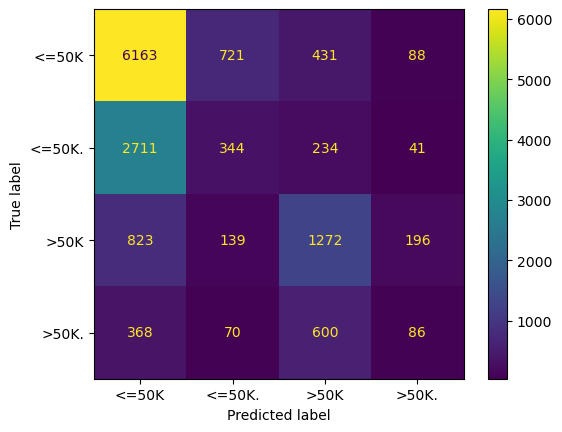

In [16]:
#Supervised Learning - Classification - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [19]:
#hyperparameter tuning on random forest
from sklearn.model_selection import GridSearchCV
from sqlalchemy import literal

params = {
    'n_estimators': list(range(70, 90, 5)),
    'max_depth': list(range(10, 15, 1)),
    'min_samples_split': [2],
    'min_samples_leaf': [2]
    }

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(rf, params, cv=5)
rf_cv.fit(x_train, y_train)

print(f'Best Score: {rf_cv.best_score_}')
print(f'Best Params: {rf_cv.best_params_}')

Best Score: 0.5870283398521343
Best Params: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75}


Accuracy: 59.02%


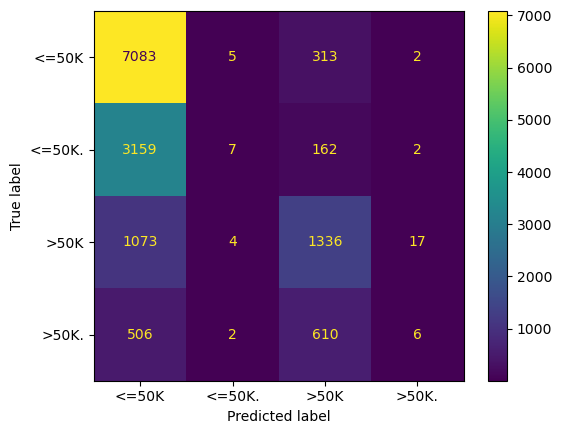

In [20]:
#Supervised Learning - Classification - Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,n_estimators=85,max_depth=14, min_samples_split=2, min_samples_leaf=2)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()